**==============================================================================================================================**

# ===================== Capestone Project ========================
<center><img src="https://blog.ipleaders.in/wp-content/uploads/2017/05/BV-Acharya-51.jpg" width="600"></img></center>

##                         Credit Card Fraud Detection Predictive Models by Sumit Kumar


# <a id='0'>Content</a>

- <a href='#1'>Load packages</a>  
- <a href='#2'>Introduction</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
    - <a href='#41'>Glimpse the data</a>  
    - <a href='#42'>Check missing data</a>
    - <a href='#43'>Check data unbalance</a>
- <a href='#5'>Data exploration</a>
- <a href='#6'>Predictive models</a>  
    - <a href='#61'>RandomForrestClassifier</a> 
    - <a href='#62'>AdaBoostClassifier</a>     
    - <a href='#63'>CatBoostClassifier</a> 
    - <a href='#64'>XGBoost</a> 
- <a href='#7'>Perform cross-validation</a>
- <a href='#7'>Compare the models</a>
- <a href='#7'>Conclusions</a>
**==============================================================================================================================**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import xgboost as xgb
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

# Introduction  

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there are not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**;  
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.  



# Read the data

In [2]:
data_df = pd.read_csv("./data.csv")

In [3]:
print("Credit Card Fraud Detection data - rows:", data_df.shape[0], "columns:", data_df.shape[1])

Credit Card Fraud Detection data - rows: 284807 columns: 31


# Glimpse the data

In [4]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check missing data

In [5]:
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum() / data_df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

        Total  Percent
Time        0      0.0
V16         0      0.0
Amount      0      0.0
V28         0      0.0
V27         0      0.0
V26         0      0.0
V25         0      0.0
V24         0      0.0
V23         0      0.0
V22         0      0.0
V21         0      0.0
V20         0      0.0
V19         0      0.0
V18         0      0.0
V17         0      0.0
V15         0      0.0
V1          0      0.0
V14         0      0.0
V13         0      0.0
V12         0      0.0
V11         0      0.0
V10         0      0.0
V9          0      0.0
V8          0      0.0
V7          0      0.0
V6          0      0.0
V5          0      0.0
V4          0      0.0
V3          0      0.0
V2          0      0.0
Class       0      0.0


# Data unbalance

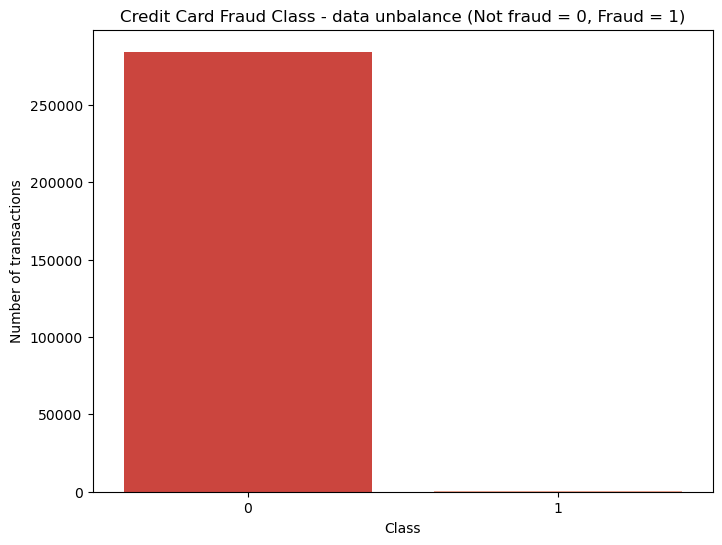

In [6]:
temp = data_df["Class"].value_counts()
class_counts = pd.DataFrame({'Class': temp.index, 'Values': temp.values})

trace = go.Bar(
    x=class_counts['Class'],
    y=class_counts['Values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=class_counts['Values']
)
data = [trace]
layout = dict(
    title='Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
    xaxis=dict(title='Class', showticklabels=True),
    yaxis=dict(title='Number of transactions'),
    hovermode='closest',
    width=600
)
fig = dict(data=data, layout=layout)
# iplot(fig, filename='class')
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Values', data=class_counts, palette='Reds_r')
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.show()

# Transactions in time

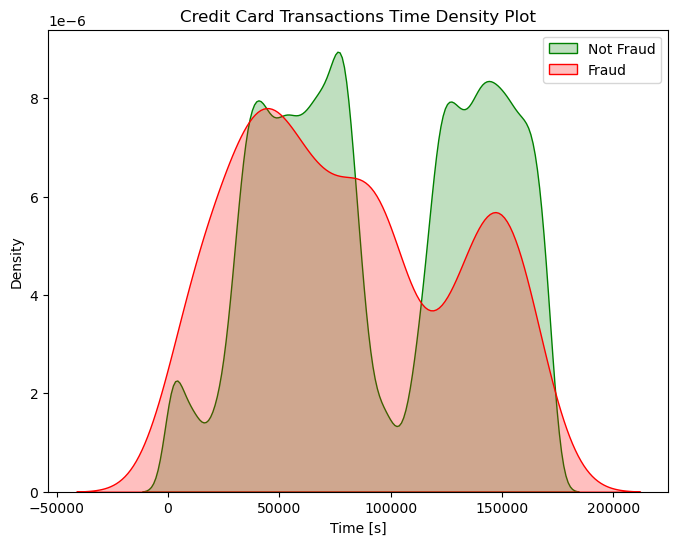

In [7]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
# iplot(fig, filename='dist_only')
plt.figure(figsize=(8, 6))
sns.kdeplot(class_0, shade=True, color="green", label='Not Fraud')
sns.kdeplot(class_1, shade=True, color="red", label='Fraud')
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

# Transactions amount

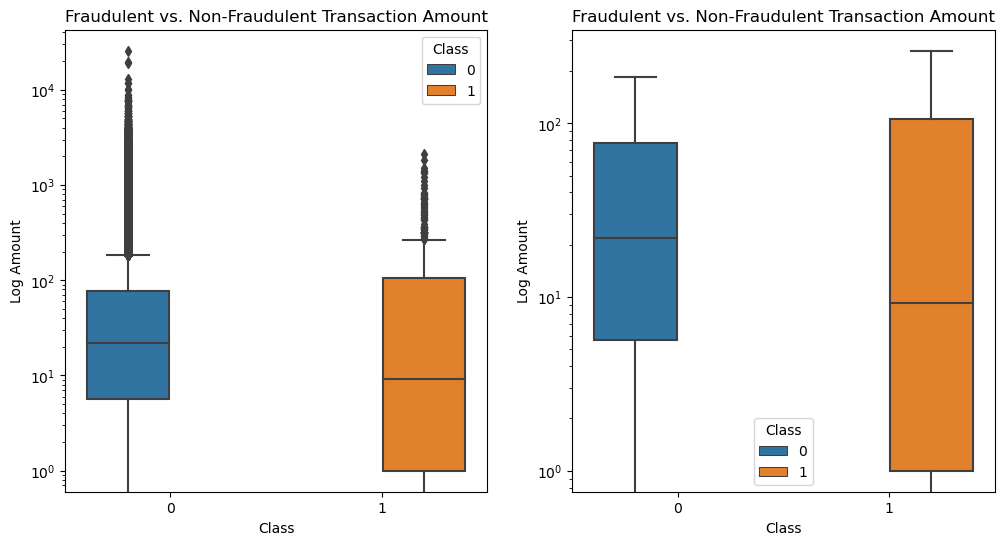

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=data_df, showfliers=True)
ax1.set_title("Fraudulent vs. Non-Fraudulent Transaction Amount")
ax1.set_yscale('log')
ax1.set_xlabel("Class")
ax1.set_ylabel("Log Amount")

sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=data_df, showfliers=False)
ax2.set_title("Fraudulent vs. Non-Fraudulent Transaction Amount")
ax2.set_yscale('log')
ax2.set_xlabel("Class")
ax2.set_ylabel("Log Amount")
plt.show()

# Features correlation plot

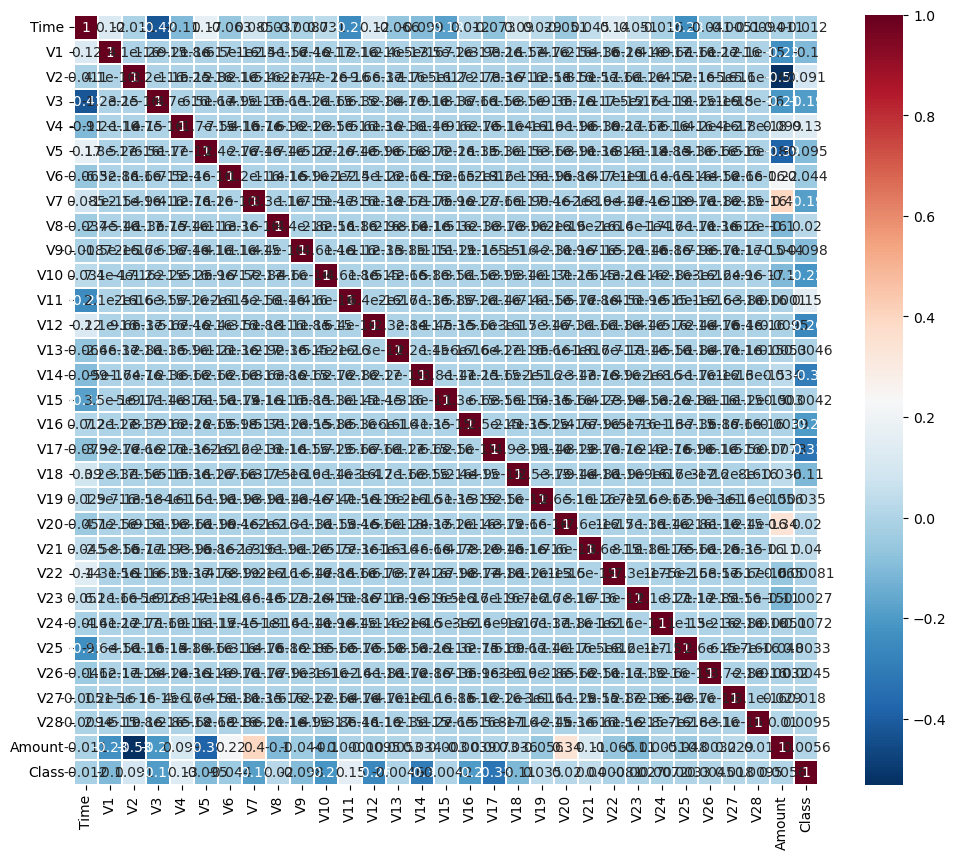

In [9]:
corr = data_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="RdBu_r", annot=True)
plt.show()

# Features density plot

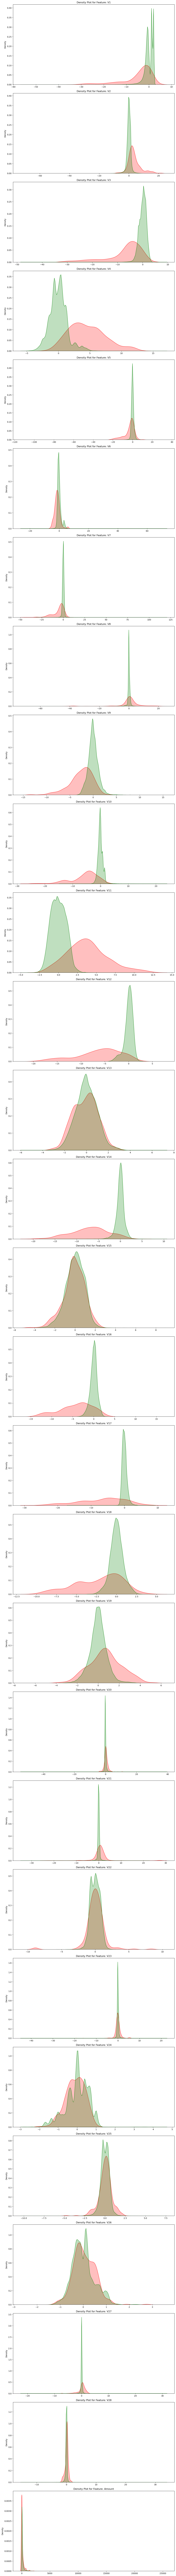

In [10]:
features = data_df.iloc[:, 1:30].columns
num_features = len(features)
num_cols = 1
num_rows = num_features // num_cols + 1

plt.figure(figsize=(12, 6 * num_rows))
gs = gridspec.GridSpec(num_rows, num_cols)

for i, c in enumerate(data_df[features]):
    ax = plt.subplot(gs[i])
    sns.kdeplot(data_df[c][data_df.Class == 1], color="red", shade=True)
    sns.kdeplot(data_df[c][data_df.Class == 0], color="green", shade=True)
    ax.set_xlabel("")
    ax.set_title("Density Plot for Feature: " + str(c))

plt.tight_layout()
plt.show()


# Split the data into train and test sets

In [11]:
X = data_df.drop(['Time', 'Class'], axis=1)
y = data_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the Random Forest model

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
auc_score_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest AUC Score:", auc_score_rf)

Random Forest AUC Score: 0.8826354754056941


# Train and evaluate the AdaBoost model

In [13]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
auc_score_ada = roc_auc_score(y_test, y_pred_ada)
print("AdaBoost AUC Score:", auc_score_ada)

AdaBoost AUC Score: 0.8774542984047867


# Train and evaluate the CatBoost model

In [14]:
cat_model = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
auc_score_cat = roc_auc_score(y_test, y_pred_cat)
print("CatBoost AUC Score:", auc_score_cat)

CatBoost AUC Score: 0.9030436386710002


# Train and evaluate the XGBoost model

In [15]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)
print("XGBoost AUC Score:", auc_score_xgb)

XGBoost AUC Score: 0.9030436386710002


# Plot AUC scores

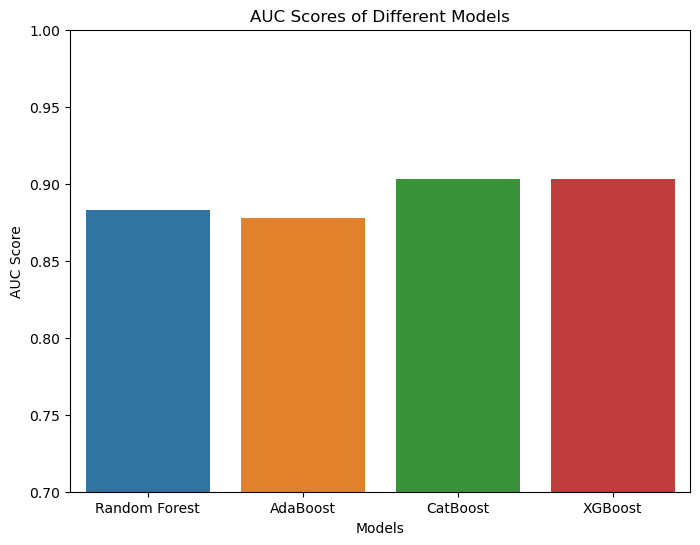

In [16]:
auc_scores = [auc_score_rf,auc_score_ada,auc_score_cat,auc_score_xgb]
models = ['Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost']
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=auc_scores)
plt.title('AUC Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.ylim([0.7, 1.0]) 
plt.show()

# Train and evaluate the models using cross-validation

In [17]:
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('CatBoost', CatBoostClassifier(iterations=100, random_state=42, verbose=False)),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]

# Perform cross-validation

In [18]:
results = []
names = []
scoring = 'roc_auc'
seed = 42
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean ROC AUC: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}")


Random Forest: Mean ROC AUC: 0.9525, Std: 0.0146
AdaBoost: Mean ROC AUC: 0.9710, Std: 0.0137
CatBoost: Mean ROC AUC: 0.9758, Std: 0.0056
XGBoost: Mean ROC AUC: 0.9792, Std: 0.0087


# Compare the models

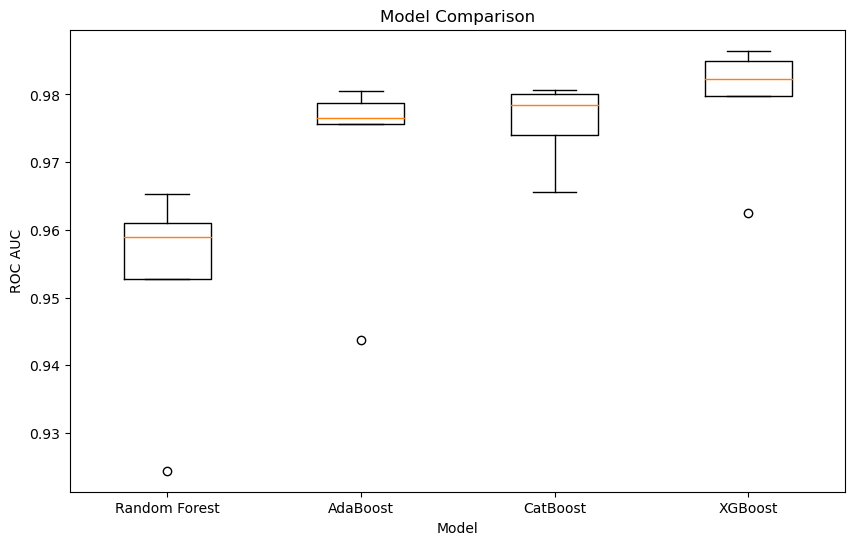

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.show()

# Conclusions

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. 
We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.  

We started with **RandomForrestClassifier**, for which we obtained an AUC scode of (**0.882**) when predicting the target for the test set.  

We followed with an **AdaBoostClassifier** model, with lower AUC score (**0.877**) for prediction of the test set target values.    

We then followed with an **CatBoostClassifier**, with the AUC score after training 100 iterations **0.903**.    

We then experimented with a **XGBoost** model. In this case, se used the validation set for validation of the training model.  The best validation score obtained was   **0.903**. 



# 